In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
# Load the dataset
firewall_data = pd.read_csv('firewall_log_data.csv')
firewall_data_encoded = pd.read_csv('firewall_log_data.csv')

# Explore the dataset
print(firewall_data.head())


            Event Time  Device Name         Device ID Virtual Domain  \
0  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   
1  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   
2  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   
3  2023-10-30 23:54:55  FGT3600C_HA  FG3K6C3A15800081           root   
4  2023-10-30 23:54:55  FGT3600C_HA  FG3K6C3A15800081           root   

     Log Date  Log Time  Log ID Log Type  Subtype   Level  ...  Policy Type  \
0  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   
1  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   
2  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   
3  2023-10-30  23:54:55      13  traffic  forward  notice  ...       policy   
4  2023-10-30  23:54:55      13  traffic  forward  notice  ...       policy   

  Service  Destination Country Source Country Transaction Disposition  \
0   HTTPS          

In [28]:
# Convert text columns to one-hot encoding
firewall_data_encoded = firewall_data

In [30]:
import pandas as pd

# Assuming you have a DataFrame named 'firewall_data' with columns 'Action', 'Service', and 'Source Country'
# Display the original DataFrame
print("Original DataFrame:")
print(firewall_data.head())

# Function to factorize and assign numerical values
def factorize_column(column):
    return pd.factorize(column)[0]

# Apply the function to the specified columns
columns_to_factorize = ['Action', 'Service', 'Source Country', 'Source IP']
firewall_data_encoded[columns_to_factorize] = firewall_data[columns_to_factorize].apply(factorize_column)

# Display the DataFrame after assigning numerical values
print("\nDataFrame after assigning numerical values:")
print(firewall_data_encoded.head())

Original DataFrame:
            Event Time  Device Name         Device ID Virtual Domain  \
0  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   
1  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   
2  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   
3  2023-10-30 23:54:55  FGT3600C_HA  FG3K6C3A15800081           root   
4  2023-10-30 23:54:55  FGT3600C_HA  FG3K6C3A15800081           root   

     Log Date  Log Time  Log ID Log Type  Subtype   Level  ...  Policy Type  \
0  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   
1  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   
2  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   
3  2023-10-30  23:54:55      13  traffic  forward  notice  ...       policy   
4  2023-10-30  23:54:55      13  traffic  forward  notice  ...       policy   

  Service  Destination Country Source Country Transaction Disposition  \

In [31]:
print("\nDataFrame after one-hot encoding:")
print(firewall_data_encoded.head(1))


DataFrame after one-hot encoding:
            Event Time  Device Name         Device ID Virtual Domain  \
0  2023-10-30 23:54:54  FGT3600C_HA  FG3K6C3A15800081           root   

     Log Date  Log Time  Log ID Log Type  Subtype   Level  ...  Policy Type  \
0  2023-10-30  23:54:54      13  traffic  forward  notice  ...       policy   

   Service  Destination Country Source Country Transaction Disposition  \
0        0             Reserved              0                    noop   

  Duration  Sent Bytes Received Bytes Sent Packets Application Category  
0       13        1097           9182           11            unscanned  

[1 rows x 34 columns]


In [32]:
firewall_data = firewall_data.dropna()
firewall_data_encoded = firewall_data_encoded.dropna()

In [33]:
# Select relevant features
features = firewall_data_encoded[['Action', 'Service', 'Source Country', 'Source IP', 'Destination Port', 'Policy ID', 'Duration', 'Sent Bytes', 'Received Bytes', 'Sent Packets', 'Protocol']]

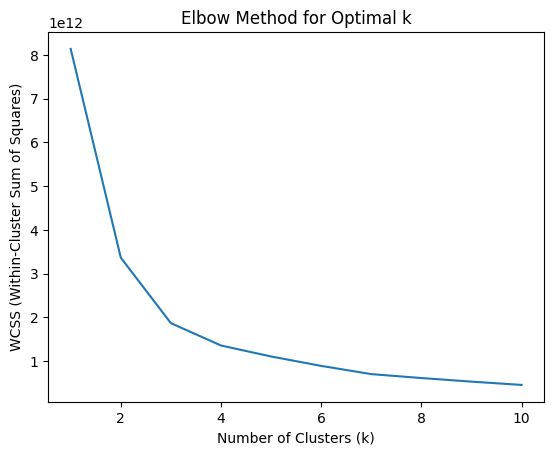

In [34]:
# Use the elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [36]:
# Apply K-means clustering
k = 3  # replace with the optimal number
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features)

# Add cluster labels to the original dataframe
firewall_data['Cluster'] = cluster_labels


In [37]:
firewall_data['Cluster']

0         2
1         2
2         2
3         0
4         2
         ..
148908    0
148909    0
148910    0
148911    0
148912    0
Name: Cluster, Length: 148913, dtype: int32

In [44]:
cluster_0_data = firewall_data[firewall_data['Cluster'] == 0]
cluster_1_data = firewall_data[firewall_data['Cluster'] == 1]
cluster_2_data = firewall_data[firewall_data['Cluster'] == 2]

# Display the data for the selected cluster
print("Data for Cluster 1:")
print(len(cluster_0_data))
print(len(cluster_1_data))
print(len(cluster_2_data))

Data for Cluster 1:
98735
3254
46924


In [43]:
csv_file_path = 'firewall_data_with_clusters.csv'

# Save the DataFrame to a CSV file
firewall_data.to_csv(csv_file_path, index=False)

print(f"DataFrame with clusters saved to: {csv_file_path}")

DataFrame with clusters saved to: firewall_data_with_clusters.csv
